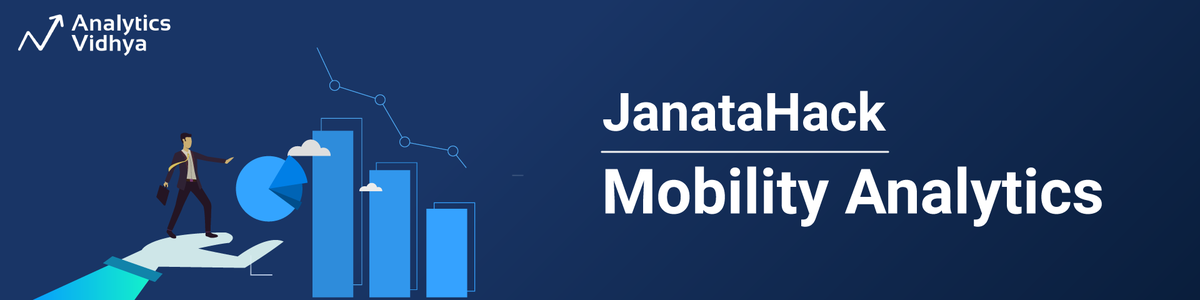

In [1]:
from PIL import Image
read_image=Image.open('/home/kumar/Documents/Projects and Practices/projects/JanataHack_Mobility_Analytics/cover_1-thumbnail-1200x1200.png')
read_image

With the upcoming cab aggregators and demand for mobility solutions, the past decade has seen immense growth in data collected from commercial vehicles with major contributors such as Uber, Lyft and Ola to name a few. 

There are loads of innovative data science and machine learning solutions being implemented using such data and that has led to tremendous business value for such organizations. 

This weekend we bring to you another JanataHack, this time relating to mobility business. Participate, compete and earn bragging rights against the best hackers globally.

In [2]:
##Importing the packages
#Data processing packages
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

#Visualization packages
import matplotlib.pyplot as plt 
import seaborn as sns 
#!pip install lightgbm

#Machine Learning packages
#!pip install catboost
from sklearn.svm import SVC,NuSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
#from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
#from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import lightgbm
#Suppress warnings
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv('/home/kumar/Documents/Projects and Practices/projects/JanataHack_Mobility_Analytics/train_Wc8LBpr.csv')
train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [4]:
test=pd.read_csv('/home/kumar/Documents/Projects and Practices/projects/JanataHack_Mobility_Analytics/test_VsU9xXK.csv')
test.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,T0005689459,9.44,A,10.0,2.57438,A,B,3.68000,2,NaN,46,63,Male
1,T0005689462,32.15,B,10.0,2.85143,A,A,1.59375,0,65.0,49,80,Female
2,T0005689463,10.38,C,4.0,2.70530,A,D,4.50500,0,NaN,47,74,Male
3,T0005689466,14.94,NaN,6.0,2.48159,C,E,4.53000,0,63.0,43,54,Male
4,T0005689468,32.03,B,7.0,2.81598,A,K,4.60125,3,96.0,44,56,Male


In [5]:
train.shape,test.shape

((131662, 14), (87395, 13))

In [6]:
combine=train.append(test)

In [7]:
combine.shape

(219057, 14)

In [8]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219057 entries, 0 to 87394
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      219057 non-null  object 
 1   Trip_Distance                219057 non-null  float64
 2   Type_of_Cab                  185689 non-null  object 
 3   Customer_Since_Months        209171 non-null  float64
 4   Life_Style_Index             185537 non-null  float64
 5   Confidence_Life_Style_Index  185537 non-null  object 
 6   Destination_Type             219057 non-null  object 
 7   Customer_Rating              219057 non-null  float64
 8   Cancellation_Last_1Month     219057 non-null  int64  
 9   Var1                         101238 non-null  float64
 10  Var2                         219057 non-null  int64  
 11  Var3                         219057 non-null  int64  
 12  Gender                       219057 non-null  object 
 13  

In [9]:
combine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Trip_Distance,219057.0,44.158725,25.507368,0.31000,24.56000,38.14000,60.72000,109.23000
Customer_Since_Months,209171.0,6.006048,3.626891,0.00000,3.00000,6.00000,10.00000,10.00000
Life_Style_Index,185537.0,2.802594,0.226323,1.31785,2.65462,2.79828,2.94765,4.87511
Customer_Rating,219057.0,2.848632,0.981100,0.00125,2.15250,2.89500,3.58125,5.00000
Cancellation_Last_1Month,219057.0,0.782915,1.036244,0.00000,0.00000,0.00000,1.00000,8.00000
Var1,101238.0,64.095972,21.747037,30.00000,46.00000,61.00000,79.00000,210.00000
Var2,219057.0,51.186586,4.974497,40.00000,48.00000,50.00000,54.00000,124.00000
Var3,219057.0,75.065777,11.580112,52.00000,67.00000,74.00000,82.00000,206.00000
Surge_Pricing_Type,131662.0,2.155747,0.738164,1.00000,2.00000,2.00000,3.00000,3.00000


In [10]:
combine.corr().transpose()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
Trip_Distance,1.000000,0.118103,0.510069,-0.055700,-0.007378,-0.041811,0.203148,0.233022,0.135928
Customer_Since_Months,0.118103,1.000000,0.135711,-0.050945,-0.007099,-0.008565,0.041820,0.114581,0.027827
Life_Style_Index,0.510069,0.135711,1.000000,0.206346,0.074902,-0.088002,0.233877,0.329218,-0.080108
Customer_Rating,-0.055700,-0.050945,0.206346,1.000000,0.004167,-0.010082,-0.303443,-0.229899,-0.155279
Cancellation_Last_1Month,-0.007378,-0.007099,0.074902,0.004167,1.000000,0.013526,0.098944,0.130950,0.185646
Var1,-0.041811,-0.008565,-0.088002,-0.010082,0.013526,1.000000,-0.048249,-0.059432,-0.040735
Var2,0.203148,0.041820,0.233877,-0.303443,0.098944,-0.048249,1.000000,0.682716,0.003437
Var3,0.233022,0.114581,0.329218,-0.229899,0.130950,-0.059432,0.682716,1.000000,-0.039309
Surge_Pricing_Type,0.135928,0.027827,-0.080108,-0.155279,0.185646,-0.040735,0.003437,-0.039309,1.000000


In [11]:
combine.isnull().sum()

Trip_ID                             0
Trip_Distance                       0
Type_of_Cab                     33368
Customer_Since_Months            9886
Life_Style_Index                33520
Confidence_Life_Style_Index     33520
Destination_Type                    0
Customer_Rating                     0
Cancellation_Last_1Month            0
Var1                           117819
Var2                                0
Var3                                0
Gender                              0
Surge_Pricing_Type              87395
dtype: int64

In [12]:
combine.Type_of_Cab.value_counts()

B    51585
C    46732
A    35878
D    31885
E    19609
Name: Type_of_Cab, dtype: int64

In [13]:
combine.Customer_Since_Months.value_counts()

10.0    70817
2.0     19445
3.0     17074
0.0     16885
5.0     14405
1.0     13965
4.0     13035
7.0     12332
6.0     12279
8.0     10525
9.0      8409
Name: Customer_Since_Months, dtype: int64

In [14]:
combine.Life_Style_Index.value_counts()

2.77608    18
2.70697    18
2.77677    18
2.78465    18
2.77957    17
           ..
2.92133     1
2.47286     1
2.49589     1
3.09877     1
3.06602     1
Name: Life_Style_Index, Length: 69677, dtype: int64

In [15]:
combine.Confidence_Life_Style_Index.value_counts()

B    67265
C    59736
A    58536
Name: Confidence_Life_Style_Index, dtype: int64

In [16]:
combine.Var1.value_counts()

39.0     2073
43.0     1991
42.0     1976
38.0     1972
40.0     1969
         ... 
141.0       1
210.0       1
139.0       1
200.0       1
159.0       1
Name: Var1, Length: 130, dtype: int64

#### EDA

In [17]:
combine.Type_of_Cab.fillna(value='Unknown',inplace=True)

In [18]:
combine.Type_of_Cab=encoder.fit_transform(combine.Type_of_Cab)

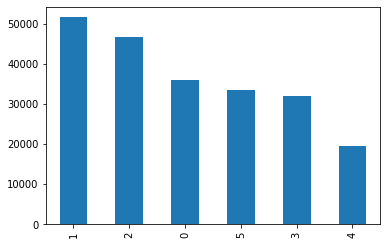

In [19]:
combine.Type_of_Cab.value_counts().plot(kind='bar')

In [20]:
combine.Customer_Since_Months.fillna(value=10.0,inplace=True)

In [21]:
combine.Customer_Since_Months=combine.Customer_Since_Months.astype(int)

In [22]:
combine.Customer_Since_Months.describe()

count    219057.000000
mean          6.186294
std           3.639793
min           0.000000
25%           3.000000
50%           7.000000
75%          10.000000
max          10.000000
Name: Customer_Since_Months, dtype: float64

In [23]:
#combine.Customer_Since_Months=np.log(combine.Customer_Since_Months)

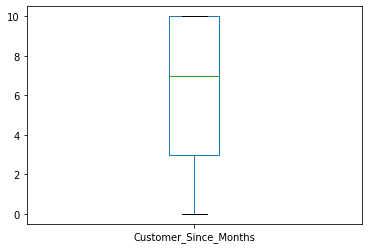

In [24]:
combine.Customer_Since_Months.plot(kind='box')

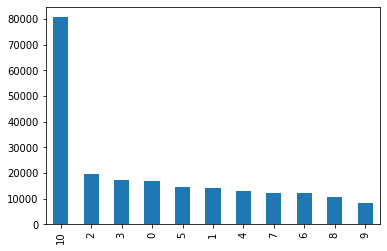

In [25]:
combine.Customer_Since_Months.value_counts().plot(kind='bar')

In [26]:
combine.Life_Style_Index.fillna(combine.Life_Style_Index.mean(),inplace=True)

In [27]:
combine.Confidence_Life_Style_Index.fillna(value='Unknown',inplace=True)

In [28]:
combine.Confidence_Life_Style_Index=encoder.fit_transform(combine.Confidence_Life_Style_Index)

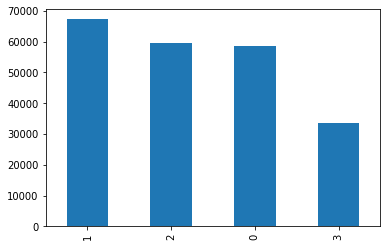

In [29]:
combine.Confidence_Life_Style_Index.value_counts().plot(kind='bar')

In [30]:
combine.Var1.fillna(combine.Var1.mean(),inplace=True)

In [31]:
combine.Var1=combine.Var1.astype(int)

In [32]:
combine.Surge_Pricing_Type.value_counts()

2.0    56728
3.0    47720
1.0    27214
Name: Surge_Pricing_Type, dtype: int64

In [33]:
combine.Gender=encoder.fit_transform(combine.Gender)

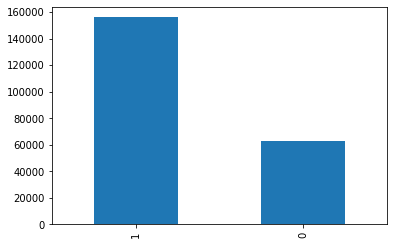

In [34]:
combine.Gender.value_counts().plot(kind='bar')

In [35]:
combine.Trip_Distance=combine.Trip_Distance.astype(int)

In [36]:
combine.Life_Style_Index=combine.Life_Style_Index.astype(int)

In [37]:
combine.Destination_Type=encoder.fit_transform(combine.Destination_Type)

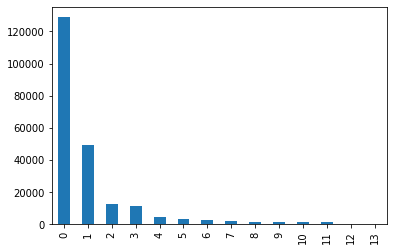

In [38]:
combine.Destination_Type.value_counts().plot(kind='bar')

In [39]:
combine.Customer_Rating=combine.Customer_Rating.astype(int)

In [40]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219057 entries, 0 to 87394
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      219057 non-null  object 
 1   Trip_Distance                219057 non-null  int64  
 2   Type_of_Cab                  219057 non-null  int64  
 3   Customer_Since_Months        219057 non-null  int64  
 4   Life_Style_Index             219057 non-null  int64  
 5   Confidence_Life_Style_Index  219057 non-null  int64  
 6   Destination_Type             219057 non-null  int64  
 7   Customer_Rating              219057 non-null  int64  
 8   Cancellation_Last_1Month     219057 non-null  int64  
 9   Var1                         219057 non-null  int64  
 10  Var2                         219057 non-null  int64  
 11  Var3                         219057 non-null  int64  
 12  Gender                       219057 non-null  int64  
 13  

In [41]:
combine.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6,1,1,2,0,0,3,0,40,46,60,0,2.0
1,T0005689461,29,1,10,2,1,0,3,0,38,56,78,1,2.0
2,T0005689464,41,5,10,2,3,4,3,2,64,56,77,1,2.0
3,T0005689465,61,2,10,2,3,0,3,0,64,52,74,1,3.0
4,T0005689467,54,2,10,3,1,0,3,4,51,49,102,1,2.0


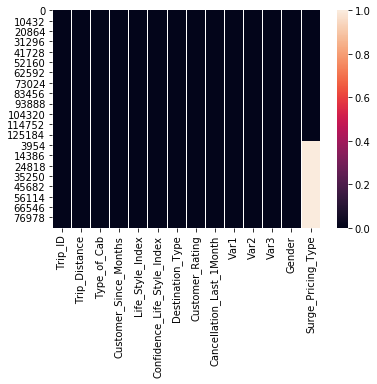

In [42]:
sns.heatmap(combine.isnull())

In [43]:
X= combine[combine['Surge_Pricing_Type'].isnull()!=True].drop(['Trip_ID','Surge_Pricing_Type'], axis=1)
y = combine[combine['Surge_Pricing_Type'].isnull()!=True]['Surge_Pricing_Type']

In [44]:
y=y.astype(int)

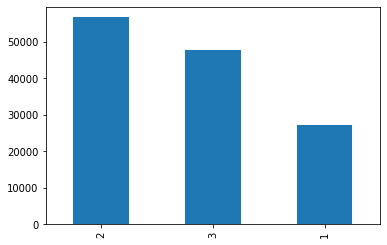

In [45]:
y.value_counts().plot(kind='bar')

In [46]:
y.describe()

count    131662.000000
mean          2.155747
std           0.738164
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           3.000000
Name: Surge_Pricing_Type, dtype: float64

In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131662 entries, 0 to 131661
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   Trip_Distance                131662 non-null  int64
 1   Type_of_Cab                  131662 non-null  int64
 2   Customer_Since_Months        131662 non-null  int64
 3   Life_Style_Index             131662 non-null  int64
 4   Confidence_Life_Style_Index  131662 non-null  int64
 5   Destination_Type             131662 non-null  int64
 6   Customer_Rating              131662 non-null  int64
 7   Cancellation_Last_1Month     131662 non-null  int64
 8   Var1                         131662 non-null  int64
 9   Var2                         131662 non-null  int64
 10  Var3                         131662 non-null  int64
 11  Gender                       131662 non-null  int64
dtypes: int64(12)
memory usage: 13.1 MB


In [48]:
x_test = combine[combine['Surge_Pricing_Type'].isnull()==True].drop(['Trip_ID','Surge_Pricing_Type'], axis=1)

In [49]:
X.shape, y.shape, x_test.shape

((131662, 12), (131662,), (87395, 12))

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [51]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [117]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier(iterations=500,depth=6,learning_rate=0.12999999,loss_function=None,verbose=True)

In [118]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [119]:
cat.fit(X_train, y_train,
          eval_set=(X_test, y_test),
         plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0180495	test: 1.0177318	best: 1.0177318 (0)	total: 121ms	remaining: 1m
1:	learn: 0.9608197	test: 0.9603725	best: 0.9603725 (1)	total: 243ms	remaining: 1m
2:	learn: 0.9172970	test: 0.9166718	best: 0.9166718 (2)	total: 328ms	remaining: 54.3s
3:	learn: 0.8838590	test: 0.8830908	best: 0.8830908 (3)	total: 412ms	remaining: 51.1s
4:	learn: 0.8582312	test: 0.8574708	best: 0.8574708 (4)	total: 498ms	remaining: 49.3s
5:	learn: 0.8372489	test: 0.8365112	best: 0.8365112 (5)	total: 574ms	remaining: 47.3s
6:	learn: 0.8205144	test: 0.8196702	best: 0.8196702 (6)	total: 656ms	remaining: 46.2s
7:	learn: 0.8080859	test: 0.8072571	best: 0.8072571 (7)	total: 735ms	remaining: 45.2s
8:	learn: 0.7979582	test: 0.7970704	best: 0.7970704 (8)	total: 810ms	remaining: 44.2s
9:	learn: 0.7884517	test: 0.7875046	best: 0.7875046 (9)	total: 887ms	remaining: 43.4s
10:	learn: 0.7805165	test: 0.7797248	best: 0.7797248 (10)	total: 969ms	remaining: 43.1s
11:	learn: 0.7738665	test: 0.7730179	best: 0.7730179 (11)	

95:	learn: 0.6958743	test: 0.7038142	best: 0.7038142 (95)	total: 7.3s	remaining: 30.7s
96:	learn: 0.6957206	test: 0.7037151	best: 0.7037151 (96)	total: 7.36s	remaining: 30.6s
97:	learn: 0.6956307	test: 0.7036783	best: 0.7036783 (97)	total: 7.44s	remaining: 30.5s
98:	learn: 0.6954501	test: 0.7036536	best: 0.7036536 (98)	total: 7.52s	remaining: 30.5s
99:	learn: 0.6952872	test: 0.7035980	best: 0.7035980 (99)	total: 7.6s	remaining: 30.4s
100:	learn: 0.6951042	test: 0.7036050	best: 0.7035980 (99)	total: 7.66s	remaining: 30.2s
101:	learn: 0.6949859	test: 0.7035165	best: 0.7035165 (101)	total: 7.71s	remaining: 30.1s
102:	learn: 0.6947296	test: 0.7034479	best: 0.7034479 (102)	total: 7.77s	remaining: 30s
103:	learn: 0.6945589	test: 0.7033189	best: 0.7033189 (103)	total: 7.83s	remaining: 29.8s
104:	learn: 0.6944408	test: 0.7032221	best: 0.7032221 (104)	total: 7.88s	remaining: 29.6s
105:	learn: 0.6942336	test: 0.7031045	best: 0.7031045 (105)	total: 7.93s	remaining: 29.5s
106:	learn: 0.6940576	tes

188:	learn: 0.6838530	test: 0.6997373	best: 0.6997373 (188)	total: 13.2s	remaining: 21.7s
189:	learn: 0.6837020	test: 0.6997053	best: 0.6997053 (189)	total: 13.3s	remaining: 21.6s
190:	learn: 0.6835889	test: 0.6996785	best: 0.6996785 (190)	total: 13.3s	remaining: 21.5s
191:	learn: 0.6835154	test: 0.6996176	best: 0.6996176 (191)	total: 13.4s	remaining: 21.4s
192:	learn: 0.6833812	test: 0.6995308	best: 0.6995308 (192)	total: 13.4s	remaining: 21.4s
193:	learn: 0.6833035	test: 0.6995250	best: 0.6995250 (193)	total: 13.5s	remaining: 21.3s
194:	learn: 0.6831499	test: 0.6994828	best: 0.6994828 (194)	total: 13.6s	remaining: 21.2s
195:	learn: 0.6831028	test: 0.6994717	best: 0.6994717 (195)	total: 13.7s	remaining: 21.2s
196:	learn: 0.6830061	test: 0.6994542	best: 0.6994542 (196)	total: 13.7s	remaining: 21.1s
197:	learn: 0.6828721	test: 0.6993998	best: 0.6993998 (197)	total: 13.8s	remaining: 21s
198:	learn: 0.6828296	test: 0.6994123	best: 0.6993998 (197)	total: 13.8s	remaining: 20.9s
199:	learn: 

280:	learn: 0.6756616	test: 0.6984900	best: 0.6984900 (280)	total: 19.3s	remaining: 15s
281:	learn: 0.6755998	test: 0.6984767	best: 0.6984767 (281)	total: 19.4s	remaining: 15s
282:	learn: 0.6755421	test: 0.6984674	best: 0.6984674 (282)	total: 19.5s	remaining: 14.9s
283:	learn: 0.6754880	test: 0.6984380	best: 0.6984380 (283)	total: 19.5s	remaining: 14.8s
284:	learn: 0.6754055	test: 0.6984551	best: 0.6984380 (283)	total: 19.6s	remaining: 14.8s
285:	learn: 0.6753400	test: 0.6984455	best: 0.6984380 (283)	total: 19.7s	remaining: 14.7s
286:	learn: 0.6752651	test: 0.6984335	best: 0.6984335 (286)	total: 19.7s	remaining: 14.6s
287:	learn: 0.6751592	test: 0.6984003	best: 0.6984003 (287)	total: 19.8s	remaining: 14.6s
288:	learn: 0.6750993	test: 0.6983932	best: 0.6983932 (288)	total: 19.9s	remaining: 14.5s
289:	learn: 0.6750482	test: 0.6983856	best: 0.6983856 (289)	total: 19.9s	remaining: 14.4s
290:	learn: 0.6749225	test: 0.6984260	best: 0.6983856 (289)	total: 20s	remaining: 14.4s
291:	learn: 0.67

375:	learn: 0.6682622	test: 0.6982394	best: 0.6981572 (332)	total: 25.4s	remaining: 8.39s
376:	learn: 0.6681726	test: 0.6982561	best: 0.6981572 (332)	total: 25.5s	remaining: 8.32s
377:	learn: 0.6681554	test: 0.6982447	best: 0.6981572 (332)	total: 25.5s	remaining: 8.24s
378:	learn: 0.6680516	test: 0.6982324	best: 0.6981572 (332)	total: 25.6s	remaining: 8.17s
379:	learn: 0.6679478	test: 0.6982852	best: 0.6981572 (332)	total: 25.7s	remaining: 8.1s
380:	learn: 0.6679046	test: 0.6982758	best: 0.6981572 (332)	total: 25.7s	remaining: 8.03s
381:	learn: 0.6678177	test: 0.6982837	best: 0.6981572 (332)	total: 25.8s	remaining: 7.96s
382:	learn: 0.6677417	test: 0.6982488	best: 0.6981572 (332)	total: 25.9s	remaining: 7.9s
383:	learn: 0.6676754	test: 0.6982378	best: 0.6981572 (332)	total: 25.9s	remaining: 7.84s
384:	learn: 0.6676000	test: 0.6982078	best: 0.6981572 (332)	total: 26s	remaining: 7.77s
385:	learn: 0.6675647	test: 0.6982113	best: 0.6981572 (332)	total: 26.1s	remaining: 7.7s
386:	learn: 0.6

469:	learn: 0.6614834	test: 0.6984627	best: 0.6981450 (400)	total: 32.1s	remaining: 2.05s
470:	learn: 0.6613983	test: 0.6984823	best: 0.6981450 (400)	total: 32.1s	remaining: 1.98s
471:	learn: 0.6613502	test: 0.6984943	best: 0.6981450 (400)	total: 32.2s	remaining: 1.91s
472:	learn: 0.6613143	test: 0.6984822	best: 0.6981450 (400)	total: 32.4s	remaining: 1.85s
473:	learn: 0.6612720	test: 0.6985014	best: 0.6981450 (400)	total: 32.5s	remaining: 1.78s
474:	learn: 0.6612091	test: 0.6985097	best: 0.6981450 (400)	total: 32.7s	remaining: 1.72s
475:	learn: 0.6611167	test: 0.6985546	best: 0.6981450 (400)	total: 32.8s	remaining: 1.65s
476:	learn: 0.6610331	test: 0.6985429	best: 0.6981450 (400)	total: 32.9s	remaining: 1.58s
477:	learn: 0.6609654	test: 0.6985565	best: 0.6981450 (400)	total: 32.9s	remaining: 1.52s
478:	learn: 0.6609066	test: 0.6985419	best: 0.6981450 (400)	total: 33s	remaining: 1.45s
479:	learn: 0.6608058	test: 0.6985501	best: 0.6981450 (400)	total: 33s	remaining: 1.38s
480:	learn: 0.

In [120]:
predict_train = cat.predict(X_train)
print('\nTarget on train data',predict_train)


Target on train data [[3]
 [1]
 [3]
 ...
 [1]
 [2]
 [3]]


In [121]:
# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)


accuracy_score on train dataset :  0.7158404131809946


In [122]:
# predict the target on the test dataset
predict_test = cat.predict(X_test)
print('\nTarget on test data',predict_test) 


Target on test data [[1]
 [3]
 [1]
 ...
 [2]
 [2]
 [1]]


In [123]:
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


accuracy_score on test dataset :  0.7007012835767994


In [124]:
final_prediction=cat.predict(x_test)
print('\nTarget on train data',final_prediction)


Target on train data [[1]
 [2]
 [2]
 ...
 [1]
 [2]
 [2]]


In [116]:
submission = pd.DataFrame()

In [61]:
submission['Trip_ID'] = test['Trip_ID']

In [62]:
submission['Surge_Pricing_Type'] = cat.predict(x_test)

In [63]:
submission.to_csv("/home/kumar/Documents/Projects and Practices/projects/JanataHack_Mobility_Analytics/Submission2.csv",index=False)

In [64]:
submission.head()

,Trip_ID,Surge_Pricing_Type
0,T0005689459,1
1,T0005689462,2
2,T0005689463,2
3,T0005689466,2
4,T0005689468,2


## Got Ranking of 112 out of 6342 participants in Private Leaderboard

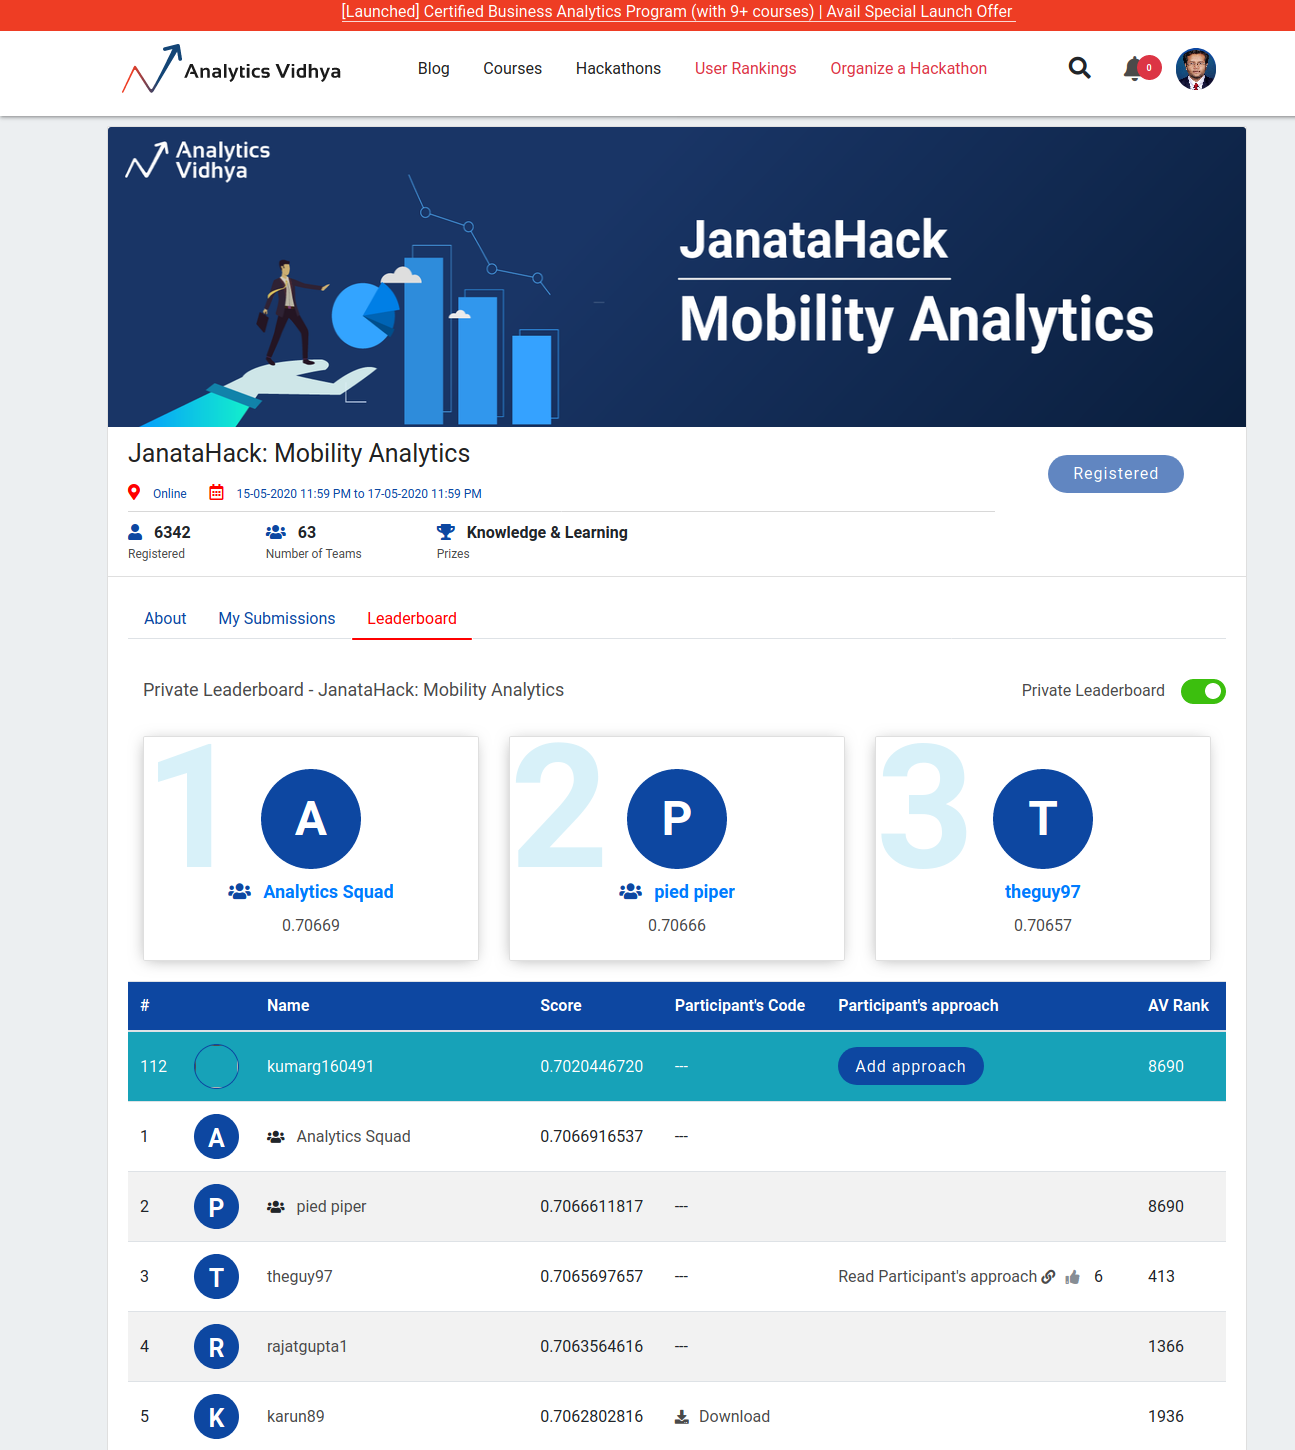

In [1]:
from PIL import Image
read_image=Image.open('/home/kumar/Downloads/Screenshot_2020-05-18 JanataHack Mobility Analytics.png')
read_image